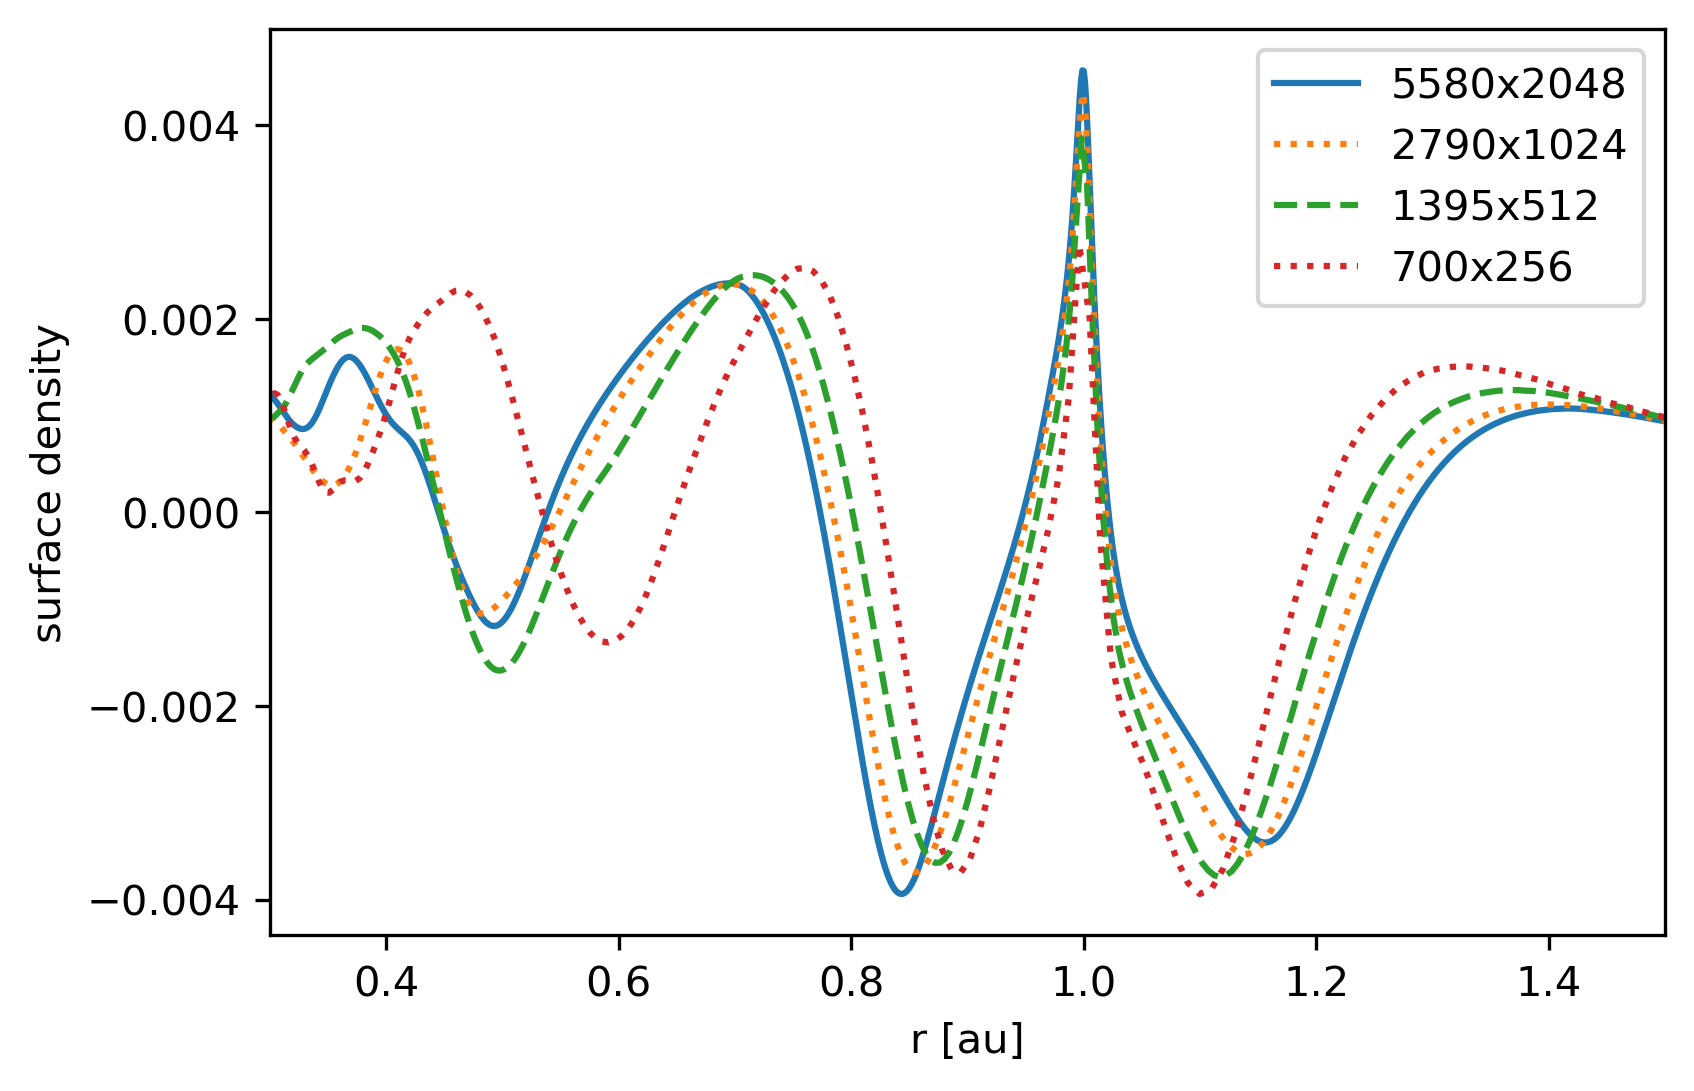

In [26]:
import readfargo as fg
import matplotlib.pyplot as plt

dir1 = './bae2017_01mth/'
dir2 = './bae2017_01mthhalfzones/'
dir3 = './bae2017_01mthquarterzones/'
dir4 = './bae2017_01mtheighthzones/'

itime = 5
r0 = 1.0
fargo1    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir2) 
fargo3    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir3) 
fargo4    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4) 
fargo1i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir2) 
fargo3i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir3) 
fargo4i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4)


fig, ax = plt.subplots(dpi = 300)
l1jup, = ax.plot(fargo1.r,(fargo1.rho.mean(axis=1)-fargo1i.rho.mean(axis=1))/fargo1i.rho.mean(axis=1), label='5580x2048')
l3jup, = ax.plot(fargo2.r,(fargo2.rho.mean(axis=1)-fargo2i.rho.mean(axis=1))/fargo2i.rho.mean(axis=1), label='2790x1024',linestyle='dotted')
l03jup, = ax.plot(fargo3.r,(fargo3.rho.mean(axis=1)-fargo3i.rho.mean(axis=1))/fargo3i.rho.mean(axis=1), label='1395x512',linestyle='dashed')
l04jup, = ax.plot(fargo4.r,(fargo4.rho.mean(axis=1)-fargo4i.rho.mean(axis=1))/fargo4i.rho.mean(axis=1), label='700x256',linestyle='dotted')
ax.legend(handles=[l1jup, l3jup,l03jup,l04jup])
ax.set_xlim(0.3,1.5)
#ax.set_ylim(1.06,.094)
ax.set_xlabel('r [au]')
ax.set_ylabel('surface density')
plt.savefig('density_plot_allzones.png',dpi=300)
